# `Krisi` Quick Intro Notebook
---
Welcome to Krisi! This notebook helps you get onboard with the core functionality of `Krisi`.

By the end you will be able to:
* evaluate your Time-Series predictions, 
* save the results and 
* generate a report.
* comparing multiple scorecards.

---

## Evaluating the results of a single ScoreCard
### First, let's import the needed libraries:

In [31]:
import numpy as np
from krisi import score
import plotly.io as pio
pio.renderers.default = "png"

### Generate normally distributed synthetic data for demonstration purposes

In [32]:
y=np.random.random(1000) # Targets
predictions=np.random.random(1000) # Artifical predictions

### Use the `score` helper function to evaluate your results

`score` simply wraps `ScoreCard` initalization and `ScoreCard.evaluate()` .

In [33]:
scorecard = score(y, predictions)

The ScoreCard object is the main engine of `krisi`. It stores the `targets` and `predictions`, the metrics that we have specified (default metrics and custom metrics) and useful *optional* metadata, such as `model_name`, `dataset_description`, etc.

Once we have the ScoreCard evaluated, we can generate various reports with it.

In [34]:
''' Printing a minimal result by passing in `minimal` '''
scorecard.print('minimal')

,Model_20230505-1556230b8c065c
Mean Absolute Error,0.110889
Mean Absolute Percentage Error,7.385812
Symmetric Mean Absolute Percentage Error,0.711206
Mean Squared Error,0.019479
Root Mean Squared Error,0.139567
R-squared,-0.948928
Mean of the Residuals,0.002519
Standard Deviation of the Residuals,0.139614


In [35]:
''' Printing a more detailed result by passing in `extended` (this is the default) '''
scorecard.print('extended')

┏━━━━━━━ Result of Model_20230505-1556230b8c065c on Dataset_20230505-155623dd06a4a6 tested on outofsample ━━━━━━━━┓
┃                                                                                                                 ┃
┃                                        Targets and Predictions Analysis                                         ┃
┃ ╭────────────────────┬──────────────────────────────────────────────────────────┬──────────────┬──────────────╮ ┃
┃ │        Series Type │ Histogram                                                │        Types │     Indicies │ ┃
┃ ├────────────────────┼──────────────────────────────────────────────────────────┼──────────────┼──────────────┤ ┃
┃ │            Targets │     ┌──────────────────────────────────────────────────┐ │      NaNs: 0 │     Start: 0 │ ┃
┃ │                    │ 76.0┤                     ███                          │ │       dtype: │     End: 999 │ ┃
┃ │                    │ 63.3┤                  ███████████                     │ │      float64 │              │ ┃
┃ │                    │ 50.7┤                ████████████████                  │ │              │              │ ┃
┃ │                    │ 38.0┤              ████████████████████                │ │              │              │ ┃
┃ │                    │ 25.3┤              ██████████████████████              │ │              │              │ ┃
┃ │                    │ 12.7┤         ███████████████████████████████          │ │              │              │ ┃
┃ │                    │  0.0┤█ ██ ██████████████████████████████████████████ ██│ │              │              │ ┃
┃ │                    │     └┬───────────┬────────────┬───────────┬───────────┬┘ │              │              │ ┃
┃ │                    │    -0.35       -0.17        0.01        0.19       0.37  │              │              │ ┃
┃ ├────────────────────┼──────────────────────────────────────────────────────────┼──────────────┼──────────────┤ ┃
┃ │        Predictions │     ┌──────────────────────────────────────────────────┐ │      NaNs: 0 │     Start: 0 │ ┃
┃ │                    │ 85.0┤                            ██                    │ │       dtype: │     End: 999 │ ┃
┃ │                    │ 70.8┤                         █████ ████               │ │      float64 │              │ ┃
┃ │                    │ 56.7┤                         ██████████               │ │              │              │ ┃
┃ │                    │ 42.5┤                     ███████████████ ███          │ │              │              │ ┃
┃ │                    │ 28.3┤                    █████████████████████         │ │              │              │ ┃
┃ │                    │ 14.2┤                ██████████████████████████████    │ │              │              │ ┃
┃ │                    │  0.0┤█      ███████████████████████████████████████████│ │              │              │ ┃
┃ │                    │     └┬───────────┬────────────┬───────────┬───────────┬┘ │              │              │ ┃
┃ │                    │    -0.43       -0.25        -0.07       0.11       0.29  │              │              │ ┃
┃ ╰────────────────────┴──────────────────────────────────────────────────────────┴──────────────┴──────────────╯ ┃
┃                                              Residual Diagnostics                                               ┃
┃ ╭─────────────────────────┬──────────────────────────────────────────────────────────┬────────────────────────╮ ┃
┃ │             Metric Name │ Result                                                   │ Parameters             │ ┃
┃ ├─────────────────────────┼──────────────────────────────────────────────────────────┼────────────────────────┤ ┃
┃ │   Residuals (residuals) │ 0     -0.039898                                          │ {}                     │ ┃
┃ │                         │ 1     -0.115117                                          │                        │ ┃
┃ │                         │ 2     -0.030332           

In jupyter notebook you can return the object and get a minimal report and the console representation printed (for exploring while debugging)

In [36]:
scorecard

,Model_20230505-1556230b8c065c
Mean Absolute Error,0.110889
Mean Absolute Percentage Error,7.385812
Symmetric Mean Absolute Percentage Error,0.711206
Mean Squared Error,0.019479
Root Mean Squared Error,0.139567
R-squared,-0.948928
Mean of the Residuals,0.002519
Standard Deviation of the Residuals,0.139614


# Evaluating on a rolling basis

The most important feature of `krisi` is that you can evaluate metrics over time.

In [37]:
scorecard_rolling = score(y, predictions, calculation='rolling') # calculation can be 'rolling', 'single' or 'benchmark'

/Users/daniel/mambaforge/envs/krisitest/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



We can then generate an `interactive` (html dash) and `pdf` report, but first let's save the scorecard!

## Save and load ScoreCards

When saving a scorecard we can decide if we also want to save the console output, by specifying `save_modes`. Options are: 
   * `SaveModes.minimal` (Minimal output as previously in the cell)
   * `SaveModes.obj` (Saves the entire object to a pickle file)
   * `SaveModes.text` (Saves the output of the console into a `txt` file)
   * `SaveModes.svg` (Creates an `svg` image of the console output)
   * `SaveModes.html` (Creates an `html` version of the console output)

Let's just save the scorecard object that we can load in later, by passing in either `[SaveMode.obj]` or simply `["obj"]`.

Two things to note:
* The scorecard gets saved by default to `output/<project_name>/<scorecards>/<current_time>`. However, we only need to worry about the `project_name` when loading, our helper function scans the directory of the specified project.
* `ScoreCard.save()` throws back itself, so that you can immediately chain a `print()`

In [38]:
scorecard.metadata.project_name = "Our example project"
scorecard.save(save_modes=["obj"]).print('minimal')

,Model_20230505-1556230b8c065c
Mean Absolute Error,0.110889
Mean Absolute Percentage Error,7.385812
Symmetric Mean Absolute Percentage Error,0.711206
Mean Squared Error,0.019479
Root Mean Squared Error,0.139567
R-squared,-0.948928
Mean of the Residuals,0.002519
Standard Deviation of the Residuals,0.139614


Once we have saved the object we can load it in. `load_scorecards` loads in all `scorecards` from a project

# Compare multiple scorecards

In [39]:
from krisi import compare

compare([score(np.random.random(1000), np.random.random(1000)) for _ in range(5)], sort_by='rmse', metric_keys=['mae', 'mse'])

,rmse,mae,mse
Model_20230505-155623f4dca2dc,0.141890,0.111921,0.020133
Model_20230505-155623091dd4f4,0.140953,0.113679,0.019868
Model_20230505-155623d050bca6,0.140538,0.112274,0.019751
Model_20230505-155623b6186a6d,0.140259,0.112374,0.019673
Model_20230505-1556234df3034c,0.138824,0.111550,0.019272


In [40]:
from krisi import load_scorecards

last_scorecard = load_scorecards("Our example project")[-1]

You can also save scorecards and load them in. `krisi` will save and load from the directory under the same `project_name` so we should specify the name.

In [41]:
project_name = "Comparing Multiple Scorecards"

for i in range(5):
    score(np.random.random(1000), 
          np.random.random(1000), 
          project_name=project_name).save()

compare(load_scorecards(project_name), sort_by='rmse', metric_keys=['mae', 'mse'])

,rmse,mae,mse
Model_20230505-1556239fd52082,0.145031,0.114443,0.021034
Model_20230505-15562381bcb4bc,0.144074,0.113683,0.020757
Model_20230505-155623b6723ba4,0.142404,0.113606,0.020279
Model_20230505-155623bcce900c,0.140336,0.112343,0.019694
Model_20230505-155623a79f49e0,0.140335,0.111867,0.019694


# Creating Reports

For reporting you need to install `krisi[plotting]`: `pip install krisi[plotting]`

There are five modes for reports:
   * `DisplayMode.pdf` or `pdf`: Creates a pdf report from the evaluated `ScoreCard`)
   * `DisplayMode.interactive` or `interactive`: Creates an interactive web version of the `ScoreCard` with `Dash`)
   * `DisplayMode.direct` or `direct`: Displays the plots individually directly in the notebook or webpage if launch outside of a notebook
   * `DisplayMode.direct_save` or `direct_save`:  Saves the plots individually
   * `DisplayMode.direct_one_subplot` or `direct_one_subplot`: Same as `direct`, except all plots are contained in one plot as subplots.

`scorecard.generate_report()` can receive a list of `DisplayModes` so you can mix and match the view (eg.: generate a pdf and also launch an interactive exploration)

For saved files look in `output/<project_name>` for saved plots look in `output/<project_name>/diagrams`

In [42]:
scorecard_rolling = score(np.random.random(1000), np.random.random(1000), calculation='rolling')

/Users/daniel/mambaforge/envs/krisitest/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



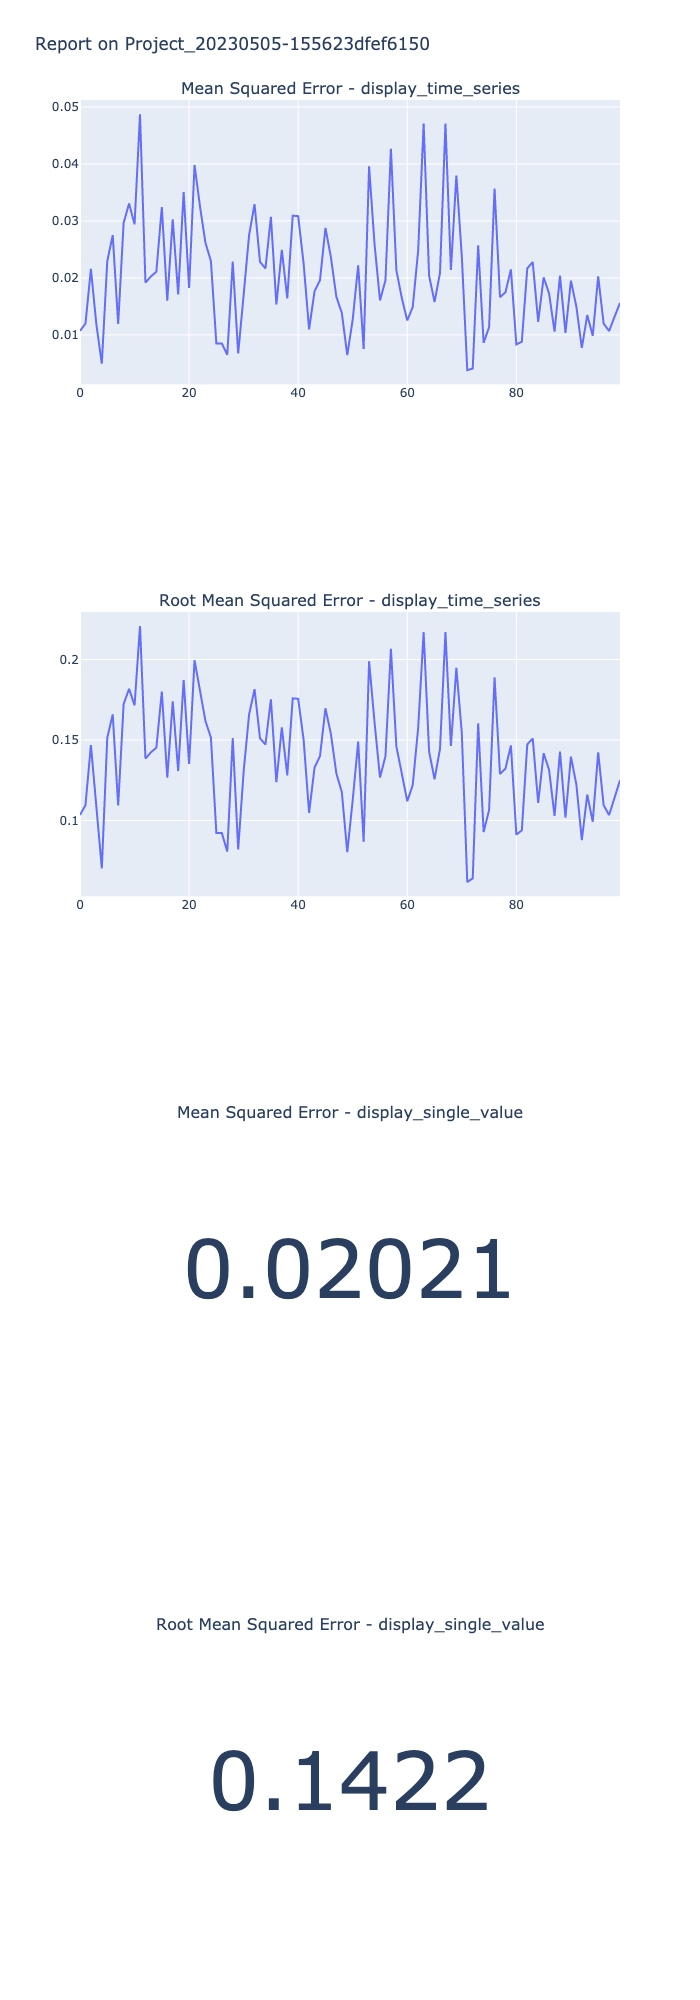

In [43]:
 # We can slice the scorecard to only include the metrics we want to display
scorecard_rolling[['rmse', 'mse']].generate_report('direct_one_subplot')

In [44]:
scorecard_rolling.generate_report(['direct_save', 'pdf'])

In [45]:
# scorecard_rolling.generate_report('interactive')